# Computer Vision Assignment: Face Recognizer
## Import necessary libs and datasets

Let me show 40 different people.
images shape: (400, 64, 64), labels shape: (400,)


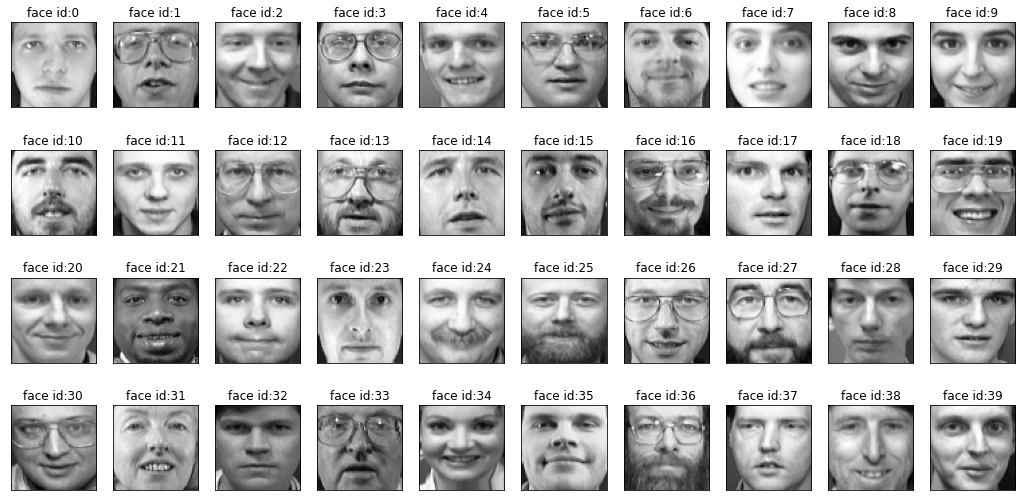

In [243]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces

%matplotlib inline

olivetti = fetch_olivetti_faces()
images = olivetti.images
labels = olivetti.target

def show_40_distinct_people(images, unique_ids):
    #Creating 4X10 subplots in  18x9 figure size
    fig, axarr=plt.subplots(nrows=4, ncols=10, figsize=(18, 9))
    #For easy iteration flattened 4X10 subplots matrix to 40 array
    axarr=axarr.flatten()
    
    #iterating over user ids
    for unique_id in unique_ids:
        image_index=unique_id*10
        axarr[unique_id].imshow(images[image_index], cmap='gray')
        axarr[unique_id].set_xticks([])
        axarr[unique_id].set_yticks([])
        axarr[unique_id].set_title("face id:{}".format(unique_id))
        
print(f"Let me show {len(np.unique(labels))} different people.")
show_40_distinct_people(images, np.unique(labels))

print(f"images shape: {images.shape}, labels shape: {labels.shape}")

## train, test split
### 평가에 사용할 예정이니 트레인, 테스트 스플릿 코드는 그대로 유지시켜주세요

In [244]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images, labels, random_state=0,
                                                   stratify=labels, test_size=0.1)

print(len(X_train), len(X_test))

360 40


## training
### Data Augmentation
#### 뉴럴 네트워크를 훈련시키는데 360개의 인스턴스는 턱없이 부족합니다. 
#### 따라서 `torchvision`의 `transforms`를 이용해서 data augmentation을 해주세요.

In [245]:
import torch
from torch import nn, optim
import torchvision
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader

compose1 = transforms.Compose([
transforms.ToPILImage(),
    transforms.RandomHorizontalFlip(p=1),
    transforms.ToTensor(),
])

compose2 = transforms.Compose([
transforms.ToPILImage(),
    transforms.RandomAffine(30),
    transforms.ToTensor(),
])

compose3 = transforms.Compose([
transforms.ToPILImage(),
    transforms.RandomHorizontalFlip(p=1),
    transforms.RandomAffine(30),
    transforms.ToTensor(),
])

compose4 = transforms.Compose([
transforms.ToPILImage(),
    transforms.RandomCrop((60,60)),
    transforms.Resize((64,64)),
    transforms.ToTensor(),
])

compose5 = transforms.Compose([
transforms.ToPILImage(),
    transforms.RandomHorizontalFlip(p=1),
    transforms.RandomCrop((60,60)),
    transforms.Resize((64,64)),
    transforms.ToTensor(),
])

[data augmentation 참고 링크(1)](https://www.analyticsvidhya.com/blog/2019/12/image-augmentation-deep-learning-pytorch/) <br>
[data augmentation 참고 링크(2)](https://colab.research.google.com/drive/109vu3F1LTzD1gdVV6cho9fKGx7lzbFll)

### 함수의 빈칸을 채워가면서 FaceDataset, FaceClassifier를 만들어주세요.

In [246]:
class FaceDataset(Dataset):
    def __init__(self,images ,labels, transform=None):
        self.images = images
        self.labels = labels
        self.transform = transform
    
    def __getitem__(self,idx):
        image=self.images[idx]
        label=self.labels[idx]
        
        if self.transform:
            image=self.transform(image)
        
        return [image, label]    

In [247]:
facedataset1 = FaceDataset(X_train,y_train,transform = compose1)
facedataset2 = FaceDataset(X_train,y_train,transform = compose2)
facedataset3 = FaceDataset(X_train,y_train,transform = compose3)
facedataset4 = FaceDataset(X_train,y_train,transform = compose4)
facedataset5 = FaceDataset(X_train,y_train,transform = compose5)

In [248]:
for i in range(0,360):
    X_train = np.append(X_train, facedataset1[i][0],axis=0)
    y_train = np.append(y_train, facedataset1[i][1])
    X_train = np.append(X_train, facedataset2[i][0],axis=0)
    y_train = np.append(y_train, facedataset2[i][1])
    X_train = np.append(X_train, facedataset3[i][0],axis=0)
    y_train = np.append(y_train, facedataset3[i][1])
    X_train = np.append(X_train, facedataset4[i][0],axis=0)
    y_train = np.append(y_train, facedataset4[i][1])
    X_train = np.append(X_train, facedataset5[i][0],axis=0)
    y_train = np.append(y_train, facedataset5[i][1])

In [249]:
X_train.shape

(2160, 64, 64)

In [250]:
y_train.shape

(2160,)

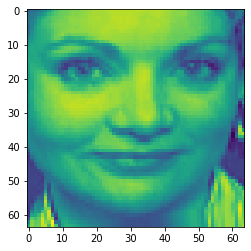

In [253]:
plt.imshow(X_train[1])

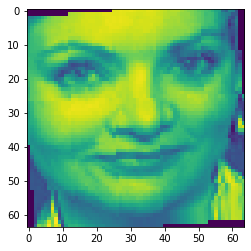

In [254]:
sample, _  = facedataset2[1]

plt.imshow(transforms.ToPILImage()(sample))
plt.show()

### 적절한 parameter를 사용해서 dataset과 train에 쓸 DataLoader를 만들어주세요.
### FaceDataset, DataLoader 생성자에 들어갈 parameter는 적당히 넣어주세요.

In [286]:
train_set = np.hstack(X_train,y_train)

TypeError: _vhstack_dispatcher() takes 1 positional argument but 2 were given

AttributeError: 'list' object has no attribute 'shape'

In [277]:
train_loader = DataLoader(train_set, batch_size = 40, shuffle =True) # your code

### 360+$\alpha$개의 훈련 인스턴스를 사용해서 train 함수를 통해 training을 해주시고,
### eval 함수를 통해 40개의 test example에 대해서 accuracy를 측정해주세요.
### 함수 및 클래스 signature와 내부 코드는 적절히 알아서 짜주시면 됩니다.

In [6]:
class FaceClassifier(nn.Module):
    def __init__(self):
        super(FaceClassifier, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(1, 3, kernel_size=3, stride=1, padding=1)
        
        
        
        
        
        
        
        
        
        
        
        
        )
    
def train(*args, **kwargs):
    '''
    your code here
    '''
    
def eval(*args, **kwargs):
    '''
    your code here
    '''